In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import to_graphviz

%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

pd.options.display.max_columns= None

In [2]:
df = pd.read_csv("Credit-Scoring-Clean.csv")

In [3]:
df

,CheckingAcctStat,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRatePecnt,SexAndStatus,OtherDetorsGuarantors,PresentResidenceTime,Property,Age,OtherInstalments,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,CreditStatus
0,A11,0.205882,A32,A43,0.161770,A61,A73,0.333333,A92,A101,0.333333,A121,0.089286,A143,A152,0.000000,A173,0.0,A191,A201,1
1,A14,0.294118,A32,A43,0.058380,A62,A74,1.000000,A94,A101,0.666667,A122,0.125000,A143,A152,0.000000,A173,0.0,A192,A201,0
2,A14,0.205882,A32,A43,0.069055,A61,A73,1.000000,A93,A101,0.333333,A124,0.232143,A143,A153,0.000000,A174,0.0,A192,A201,0
3,A11,0.647059,A32,A43,0.358094,A61,A73,0.666667,A92,A101,0.333333,A123,0.214286,A143,A152,0.000000,A173,0.0,A192,A201,1
4,A13,0.029412,A33,A43,0.023825,A61,A72,0.333333,A92,A101,0.000000,A122,0.178571,A141,A152,0.000000,A173,0.0,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,A12,0.341710,A32,A45,0.154877,A61,A73,1.000000,A94,A101,0.333333,A123,0.191593,A143,A152,0.000000,A173,0.0,A191,A201,1
946,A11,0.175015,A31,A43,0.134978,A61,A73,1.000000,A91,A101,0.179146,A123,0.717821,A143,A153,0.247931,A173,0.0,A191,A201,1
947,A11,0.173663,A34,A43,0.121347,A61,A73,1.000000,A92,A101,0.093443,A124,0.222093,A143,A153,0.000000,A173,0.0,A191,A201,1
948,A11,0.060279,A32,A44,0.045761,A62,A72,1.000000,A92,A101,0.487520,A122,0.068551,A143,A152,0.000000,A173,0.0,A191,A201,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CheckingAcctStat       950 non-null    object 
 1   Duration               950 non-null    float64
 2   CreditHistory          950 non-null    object 
 3   Purpose                950 non-null    object 
 4   CreditAmount           950 non-null    float64
 5   Savings                950 non-null    object 
 6   Employment             950 non-null    object 
 7   InstallmentRatePecnt   950 non-null    float64
 8   SexAndStatus           950 non-null    object 
 9   OtherDetorsGuarantors  950 non-null    object 
 10  PresentResidenceTime   950 non-null    float64
 11  Property               950 non-null    object 
 12  Age                    950 non-null    float64
 13  OtherInstalments       950 non-null    object 
 14  Housing                950 non-null    object 
 15  Existi

In [5]:
df = df.select_dtypes(exclude=['object'])

In [6]:
df

,Duration,CreditAmount,InstallmentRatePecnt,PresentResidenceTime,Age,ExistingCreditsAtBank,NumberDependents,CreditStatus
0,0.205882,0.161770,0.333333,0.333333,0.089286,0.000000,0.0,1
1,0.294118,0.058380,1.000000,0.666667,0.125000,0.000000,0.0,0
2,0.205882,0.069055,1.000000,0.333333,0.232143,0.000000,0.0,0
3,0.647059,0.358094,0.666667,0.333333,0.214286,0.000000,0.0,1
4,0.029412,0.023825,0.333333,0.000000,0.178571,0.000000,0.0,0
...,...,...,...,...,...,...,...,...
945,0.341710,0.154877,1.000000,0.333333,0.191593,0.000000,0.0,1
946,0.175015,0.134978,1.000000,0.179146,0.717821,0.247931,0.0,1
947,0.173663,0.121347,1.000000,0.093443,0.222093,0.000000,0.0,1
948,0.060279,0.045761,1.000000,0.487520,0.068551,0.000000,0.0,1


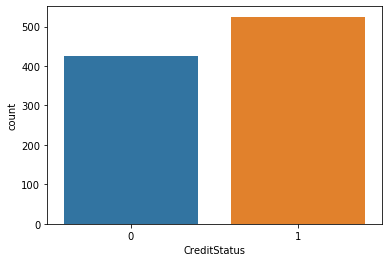

In [7]:
sns.countplot(df['CreditStatus'])
plt.show()

In [8]:
df.describe()

,Duration,CreditAmount,InstallmentRatePecnt,PresentResidenceTime,Age,ExistingCreditsAtBank,NumberDependents,CreditStatus
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,0.263065,0.170909,0.677493,0.622210,0.281522,0.120408,0.168831,0.552632
std,0.171636,0.149191,0.360865,0.358755,0.192646,0.172864,0.370883,0.497484
min,0.000000,0.001431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.063684,0.333333,0.333333,0.126539,0.000000,0.000000,0.000000
50%,0.232383,0.125665,0.810761,0.666667,0.232143,0.000000,0.000000,1.000000
75%,0.352941,0.226759,1.000000,1.000000,0.392857,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.982143,1.000000,1.000000,1.000000


In [9]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [10]:
X.values, y.values

(array([[0.20588235, 0.16176956, 0.33333333, ..., 0.08928571, 0.        ,
         0.        ],
        [0.29411765, 0.0583801 , 1.        , ..., 0.125     , 0.        ,
         0.        ],
        [0.20588235, 0.06905469, 1.        , ..., 0.23214286, 0.        ,
         0.        ],
        ...,
        [0.17366284, 0.12134696, 1.        , ..., 0.22209348, 0.        ,
         0.        ],
        [0.0602793 , 0.04576071, 1.        , ..., 0.06855058, 0.        ,
         0.        ],
        [0.06163128, 0.01606515, 1.        , ..., 0.05478037, 0.        ,
         0.        ]]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [12]:
X_train.shape, X_test.shape

((760, 7), (190, 7))

In [13]:
xgb = XGBClassifier(random_state=0, n_estimators=200)

In [14]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.378947
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.357895
[2]	validation_0-error:0.357895
[3]	validation_0-error:0.347368
[4]	validation_0-error:0.347368
[5]	validation_0-error:0.357895
[6]	validation_0-error:0.347368
[7]	validation_0-error:0.342105
[8]	validation_0-error:0.321053
[9]	validation_0-error:0.321053
[10]	validation_0-error:0.310526
[11]	validation_0-error:0.3
[12]	validation_0-error:0.3
[13]	validation_0-error:0.289474
[14]	validation_0-error:0.289474
[15]	validation_0-error:0.289474
[16]	validation_0-error:0.278947
[17]	validation_0-error:0.268421
[18]	validation_0-error:0.252632
[19]	validation_0-error:0.247368
[20]	validation_0-error:0.242105
[21]	validation_0-error:0.242105
[22]	validation_0-error:0.236842
[23]	validation_0-error:0.236842
[24]	validation_0-error:0.247368
[25]	validation_0-error:0.242105
[26]	validation_0-error:0.231579
[27]	validation_0-error:0.231579
[28]	validation_0-error:0.2263

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
y_pred = xgb.predict(X_test)

In [16]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

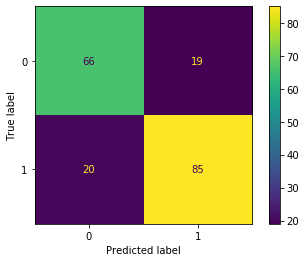

In [17]:
plot_confusion_matrix(xgb,X_test,y_test)
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        85
           1       0.82      0.81      0.81       105

    accuracy                           0.79       190
   macro avg       0.79      0.79      0.79       190
weighted avg       0.79      0.79      0.79       190



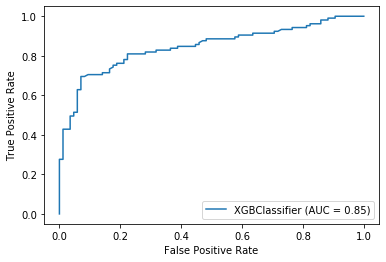

In [19]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()